### 1.2.1 : EDA: Advanced Feature Extraction.


In [12]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

import re
from nltk.corpus import stopwords
#import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
# This package is used for finding longest common subsequence between two strings
# you can write your own dp code for this
#import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from fuzzywuzzy import fuzz
from sklearn.manifold import TSNE
# Import the Required lib packages for WORD-Cloud generation
# https://stackoverflow.com/questions/45625434/how-to-install-wordcloud-in-python3-6
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image

In [13]:
dfnlp = pd.read_csv(r"D:\\Personal\\Applied AI\\Qoora\\nlp_features_train.csv",encoding='latin-1')
dfnlp.dropna(inplace=True)

In [21]:
dfnlp.head()

,id,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,0.999980,0.833319,0.999983,0.999983,...,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,0.799984,0.399996,0.749981,0.599988,...,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,0.399992,0.333328,0.399992,0.249997,...,0.285712,0.0,1.0,4.0,12.0,66,66,54,54,0.166667
3,3,7,8,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,2.0,12.0,36,36,35,40,0.039216
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,0.399992,0.199998,0.999950,0.666644,...,0.307690,0.0,1.0,6.0,10.0,67,47,46,56,0.175000


In [16]:
dfnlp.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio'],
      dtype='object')

### The difference in length for duplicate and non duplicate questions follow the same distribution

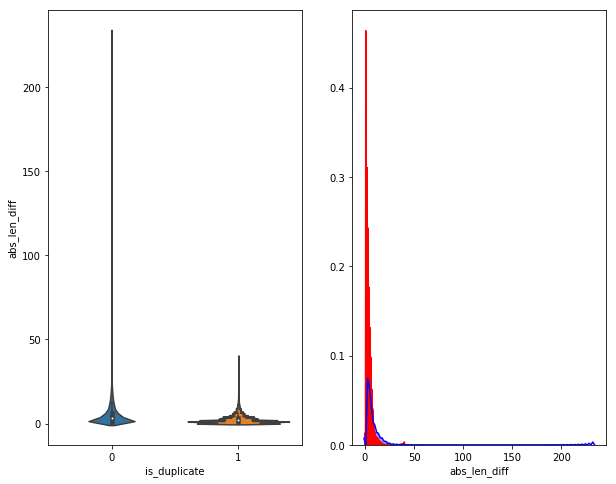

In [28]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'abs_len_diff', data = dfnlp[0:])

plt.subplot(1,2,2)
sns.distplot(dfnlp[dfnlp['is_duplicate'] == 1.0]['abs_len_diff'][0:] , label = "1", color = 'red')
sns.distplot(dfnlp[dfnlp['is_duplicate'] == 0.0]['abs_len_diff'][0:] , label = "0" , color = 'blue' )
plt.show()

1. Common word count ratios are more for duplicate questions and relatively less for non duplicate questions
2. This is evident from the violin plot and distribution plot. In the distribution plot the duplicate(red) questions curve has higher value towards greater values of cwc and the non duplicate questions have greater value towards lower values of cwc

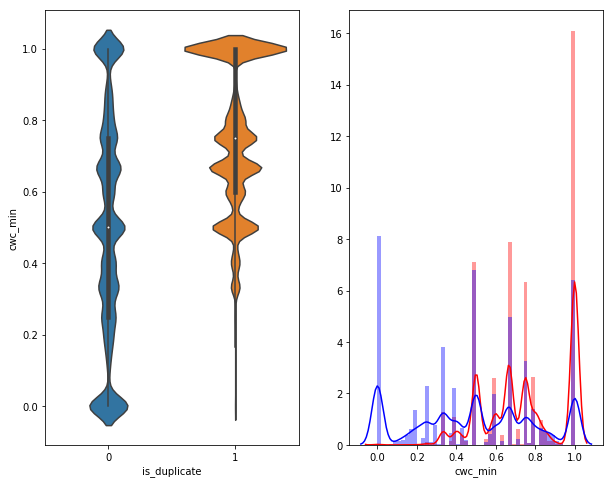

In [33]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'cwc_min', data = dfnlp[0:])

plt.subplot(1,2,2)
sns.distplot(dfnlp[dfnlp['is_duplicate'] == 1.0]['cwc_min'][0:] , label = "1", color = 'red')
sns.distplot(dfnlp[dfnlp['is_duplicate'] == 0.0]['cwc_min'][0:] , label = "0" , color = 'blue' )
plt.show()

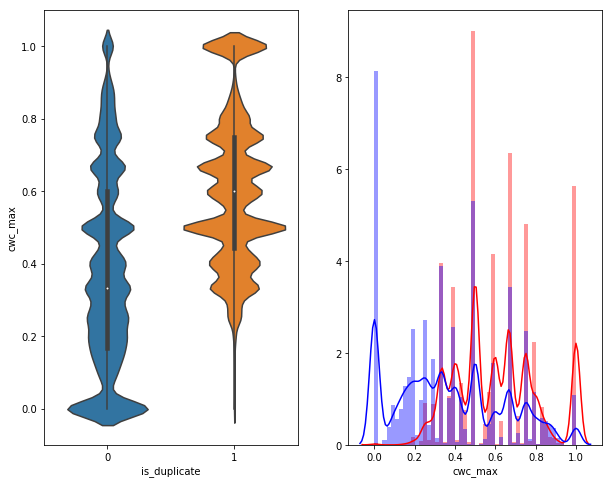

In [34]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'cwc_max', data = dfnlp[0:])

plt.subplot(1,2,2)
sns.distplot(dfnlp[dfnlp['is_duplicate'] == 1.0]['cwc_max'][0:] , label = "1", color = 'red')
sns.distplot(dfnlp[dfnlp['is_duplicate'] == 0.0]['cwc_max'][0:] , label = "0" , color = 'blue' )
plt.show()

In [27]:
len(dfnlp[dfnlp['is_duplicate'] == 0.0])

255007

In [26]:
len(dfnlp[dfnlp['is_duplicate'] == 1.0])

149263